In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import sys
import gzip
from scipy import stats
import scipy as sp
import community
import datetime

from network_ei import *
from get_motifs import *
from causal_emergence import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 05: Applying Causal Emergence

## Dataset 1: 
Neural network of the nematode C. Elegans (from http://networkdata.ics.uci.edu/data/celegansneural/celegansneural.txt)

Compiled by Duncan Watts and Steven Strogatz from original experimental data by White et al.

The file celegansneural.gml describes a weighted, directed network representing the neural network of C. Elegans.  The data were taken from the web site of Prof. Duncan Watts at Columbia University, http://cdg.columbia.edu/cdg/datasets.  The nodes in the original data were not consecutively numbered, so they have been renumbered to be consecutive. The original node numbers from Watts' data file are retained as the labels of the nodes.  Edge weights are the weights given by Watts.

Reference:
- J. G. White, E. Southgate, J. N. Thompson, and S. Brenner, "The structure of the nervous system of the nematode C. Elegans", Phil. Trans. R. Soc. London 314, 1-340 (1986).
- D. J. Watts and S. H. Strogatz, "Collective dynamics of 'small-world' networks", Nature 393, 440-442 (1998).
_____________________________________________

## 5.0.1 $EI$ in c. Elegans Connectome
_________________________

In [3]:
G = nx.read_pajek("/Users/brennan/Downloads/celegansneural.paj")
Gu = G.to_undirected()

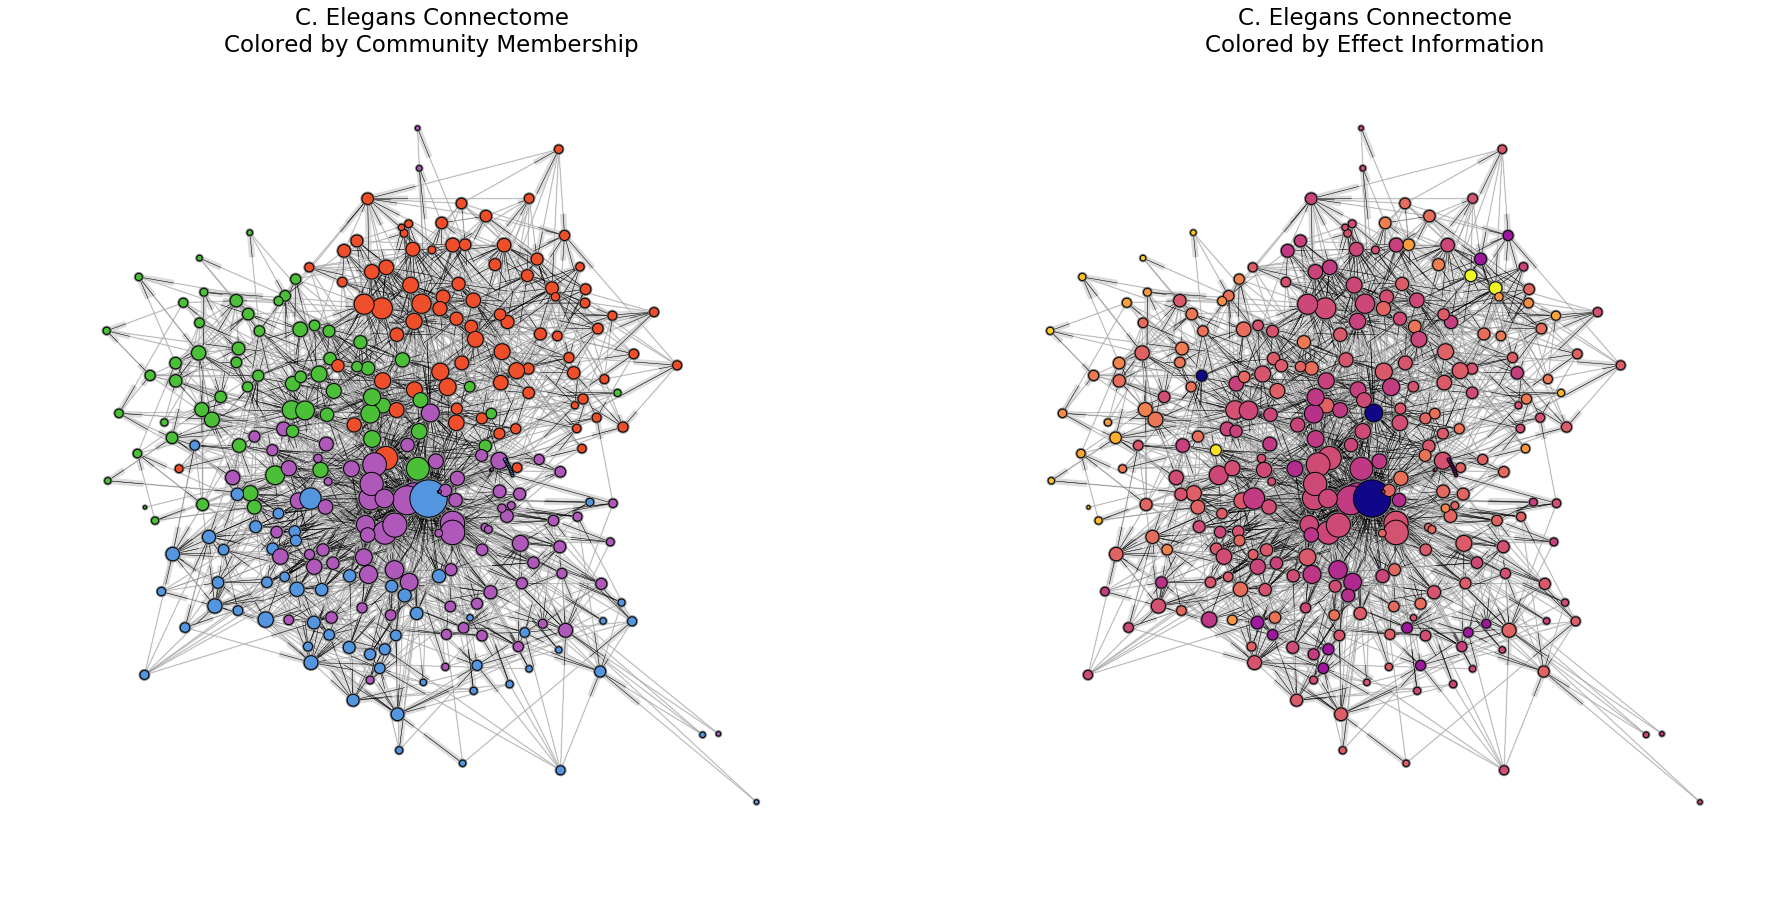

In [16]:
partition = community.best_partition(Gu)
comms = np.array([partition[str(i)] for i in G.nodes()])
colors = ["#4bbf37","#ae59ba","#ee4f2a","#5396df"]
node_colors_co = [colors[i] for i in comms]

ei_nodes = np.array([get_ei_i(G, int(i)) for i in G.nodes()])
node_colors_ei = [plt.cm.plasma((ei_nodes+0.05)/max(ei_nodes))][0]

ns = np.array(list(dict(G.degree()).values()))*10


pos = nx.kamada_kawai_layout(G)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(31,15))

nx.draw_networkx_nodes(G, pos, node_color=node_colors_co, 
                       linewidths=3, node_size=ns, 
                       alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color=node_colors_co, 
                       linewidths=1, node_size=ns, 
                       ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",
                       width=1.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", 
                       width=0.15, alpha=0.8, ax=ax0)
ax0.axis('off')
title0 = "C. Elegans Connectome\nColored by Community Membership"
ax0.set_title(title0, size=23)

nx.draw_networkx_nodes(G, pos, node_color=node_colors_ei, 
                       linewidths=3, node_size=ns, 
                       alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color=node_colors_ei, 
                       linewidths=1, node_size=ns, 
                       ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro", 
                       width=1.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", 
                       width=0.15, alpha=0.8, ax=ax1)
ax1.axis('off')
title1 = "C. Elegans Connectome\nColored by Effect Information"
ax1.set_title(title1, size=23)

# plt.savefig("figs/CausalEmergence_cElegans.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_cElegans.pdf", dpi=425, bbox_inches='tight')
plt.show()

## 5.1.0 Searching *Paths*: Causal Emergence in C. Elegans
_________________________

In [18]:
ei_G = get_ei(G)
N = G.number_of_nodes()
K_avg_in = np.mean(list(dict(G.in_degree()).values()))
K_avg_out = np.mean(list(dict(G.out_degree()).values()))

ei_diff_edges1 = []
success_edges1 = []
paths_length_1 = get_paths(G, d=1)
print("There are",len(paths_length_1)," paths of length=1 in the C. Elegans Connectome")

ei_diff_edges2 = []
success_edges2 = []
paths_length_2 = get_paths(G, d=2)
print("There are",len(paths_length_2),"paths of length=2 in the C. Elegans Connectome")

ei_diff_edges3 = []
success_edges3 = []
paths_length_3 = get_paths(G, d=3)
print("There are",len(paths_length_3),"paths of length=3 in the C. Elegans Connectome")

ei_diff_edges4 = []
success_edges4 = []
paths_length_4 = get_paths(G, d=4)
print("There are",len(paths_length_4),"paths of length=4 in the C. Elegans Connectome")

groupings_to_check = []
for i in paths_length_1:
    groupings_to_check.append(i) 
for i in paths_length_2:
    groupings_to_check.append(i) 
for i in paths_length_3:
    groupings_to_check.append(i) 
for i in paths_length_4:
    groupings_to_check.append(i) 

print("There are",len(set(groupings_to_check)),"possible pairs of nodes to check (within 4 hops).")

There are 2345  paths of length=1 in the C. Elegans Connectome
There are 13464 paths of length=2 in the C. Elegans Connectome
There are 33892 paths of length=3 in the C. Elegans Connectome
There are 48240 paths of length=4 in the C. Elegans Connectome
There are 48591 possible pairs of nodes to check (within 4 hops).


In [3]:
# ei_diff_dict1, _ = get_ei_diff(G, paths_length_1, printt=True)
# ei_diff_dict2, _ = get_ei_diff(G, paths_length_2, printt=True)
# ei_diff_dict3, _ = get_ei_diff(G, paths_length_3, printt=True)
# ei_diff_dict4, _ = get_ei_diff(G, paths_length_4, printt=True)

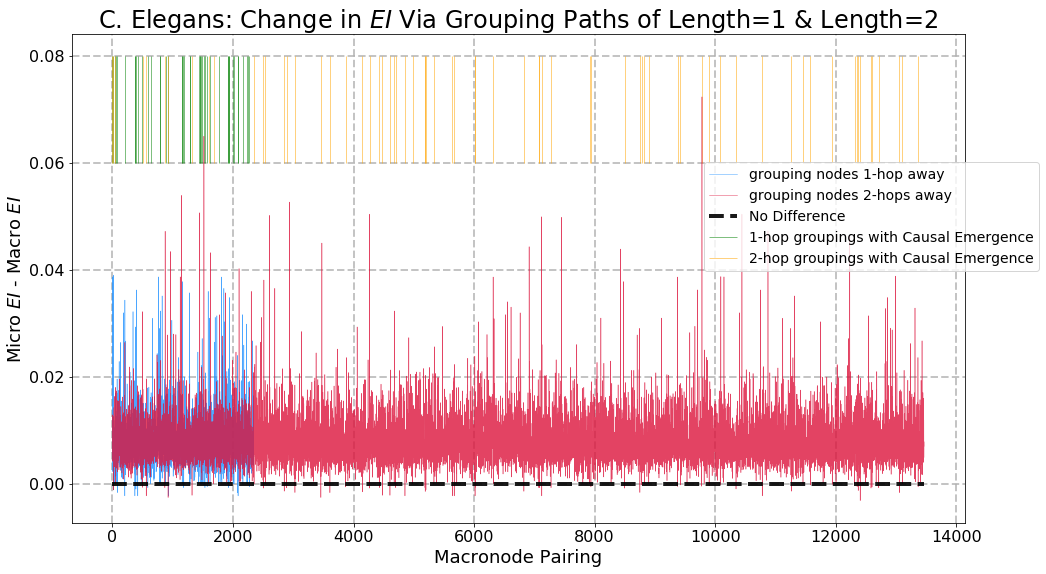

In [52]:
# plt.figure(figsize=(16,9))
# plt.plot(ei_diff_dict1.values(), lw=0.5, alpha=0.8, c='dodgerblue', 
#          label='grouping nodes 1-hop away')
# plt.plot(ei_diff_dict2.values(), lw=0.5, alpha=0.8, c='crimson', 
#          label='grouping nodes 2-hops away')
# plt.plot([0, len(list(ei_diff_dict2.values()))],[0, 0], c='k', 
#          alpha=0.9, linestyle='--', lw=4.0, label="No Difference")

# plt.vlines(0, ymin=0.06, ymax=0.08, linewidth=0.5, color='green', 
#            label="1-hop groupings with Causal Emergence")
# plt.vlines(0, ymin=0.06, ymax=0.08, linewidth=0.5, color='orange', 
#            label="2-hop groupings with Causal Emergence")
# for i, key in enumerate(list(ei_diff_dict1.keys())):
#     if ei_diff_dict1[key] < 0.0:
#         plt.vlines(i, ymin=0.06, ymax=0.08, linewidth=0.5, color='green')

# for i, key in enumerate(list(ei_diff_dict2.keys())):
#     if ei_diff_dict2[key] < 0.0:
#         plt.vlines(i, ymin=0.06, ymax=0.08, linewidth=0.5, color='orange')

# plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.75)
# plt.title("C. Elegans: Change in $EI$ Via Grouping Paths of Length=1 & Length=2", size=24)
# plt.xlabel("Macronode Pairing", size=18)
# plt.ylabel("Micro $EI$ - Macro $EI$", size=18)
# plt.xticks(size=16)
# plt.yticks(size=16)
# plt.legend(fontsize=14, bbox_to_anchor=[0.7, 0.5])
# # plt.savefig("figs/CausalEmergence_cElegans_PathLen1&2.pdf", dpi=425, bbox_inches='tight')
# # plt.savefig("figs/CausalEmergence_cElegans_PathLen1&2.png", dpi=425, bbox_inches='tight')
# plt.show()

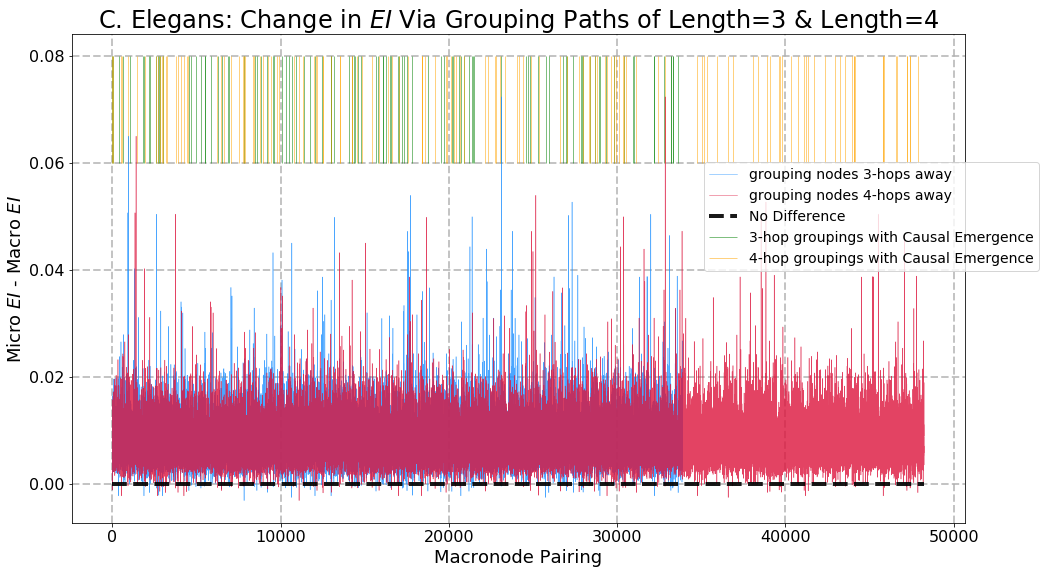

In [56]:
plt.figure(figsize=(16,9))
plt.plot(ei_diff_dict3.values(), lw=0.5, alpha=0.8, c='dodgerblue', 
         label='grouping nodes 3-hops away')
plt.plot(ei_diff_dict4.values(), lw=0.5, alpha=0.8, c='crimson', 
         label='grouping nodes 4-hops away')
plt.plot([0, len(list(ei_diff_dict4.values()))],[0, 0], c='k', 
         alpha=0.9, linestyle='--', lw=4.0, label="No Difference")

plt.vlines(0, ymin=0.06, ymax=0.08, linewidth=0.5, color='green', 
           label="3-hop groupings with Causal Emergence")
plt.vlines(0, ymin=0.06, ymax=0.08, linewidth=0.5, color='orange', 
           label="4-hop groupings with Causal Emergence")
for i, key in enumerate(list(ei_diff_dict3.keys())):
    if ei_diff_dict3[key] < 0.0:
        plt.vlines(i, ymin=0.06, ymax=0.08, linewidth=0.5, color='green')

for i, key in enumerate(list(ei_diff_dict4.keys())):
    if ei_diff_dict4[key] < 0.0:
        plt.vlines(i, ymin=0.06, ymax=0.08, linewidth=0.5, color='orange')

plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.75)
plt.title("C. Elegans: Change in $EI$ Via Grouping Paths of Length=3 & Length=4", size=24)
plt.xlabel("Macronode Pairing", size=18)
plt.ylabel("Micro $EI$ - Macro $EI$", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=14, bbox_to_anchor=[0.7, 0.5])
# plt.savefig("figs/CausalEmergence_cElegans_PathLen3&4.pdf", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_cElegans_PathLen3&4.png", dpi=425, bbox_inches='tight')
plt.show()

In [5]:
# np.save("ei_diff_dict1.npy", ei_diff_dict1)
# np.save("ei_diff_dict2.npy", ei_diff_dict2)
# np.save("ei_diff_dict3.npy", ei_diff_dict3)
# np.save("ei_diff_dict4.npy", ei_diff_dict4)
ei_diff_dict1 = np.load("ei_diff_dict1.npy").item()
ei_diff_dict2 = np.load("ei_diff_dict2.npy").item()
ei_diff_dict3 = np.load("ei_diff_dict3.npy").item()
ei_diff_dict4 = np.load("ei_diff_dict4.npy").item()

In [6]:
edges1 = {}
edges2 = {}
edges3 = {}
edges4 = {}

for eij in ei_diff_dict1.keys():
    if ei_diff_dict1[eij] <= 0.0:
        edges1[eij] = ei_diff_dict1[eij]
        
for eij in ei_diff_dict2.keys():
    if ei_diff_dict2[eij] <= 0.0:
        edges2[eij] = ei_diff_dict2[eij]
        
for eij in ei_diff_dict3.keys():
    if ei_diff_dict3[eij] <= 0.0:
        edges3[eij] = ei_diff_dict3[eij]
        
for eij in ei_diff_dict4.keys():
    if ei_diff_dict4[eij] <= 0.0:
        edges4[eij] = ei_diff_dict4[eij]

In [7]:
biggest = max([-min(edges1.values()), -min(edges2.values()),
               -min(edges3.values()), -min(edges4.values())])*2
ei1 = (-2*np.array(list(edges1.values())))/biggest
ei2 = (-2*np.array(list(edges2.values())))/biggest
ei3 = (-2*np.array(list(edges3.values())))/biggest
ei4 = (-2*np.array(list(edges4.values())))/biggest

ec1 = [plt.cm.plasma(ei1)][0]
ec2 = [plt.cm.plasma(ei2)][0]
ec3 = [plt.cm.plasma(ei3)][0]
ec4 = [plt.cm.plasma(ei4)][0]

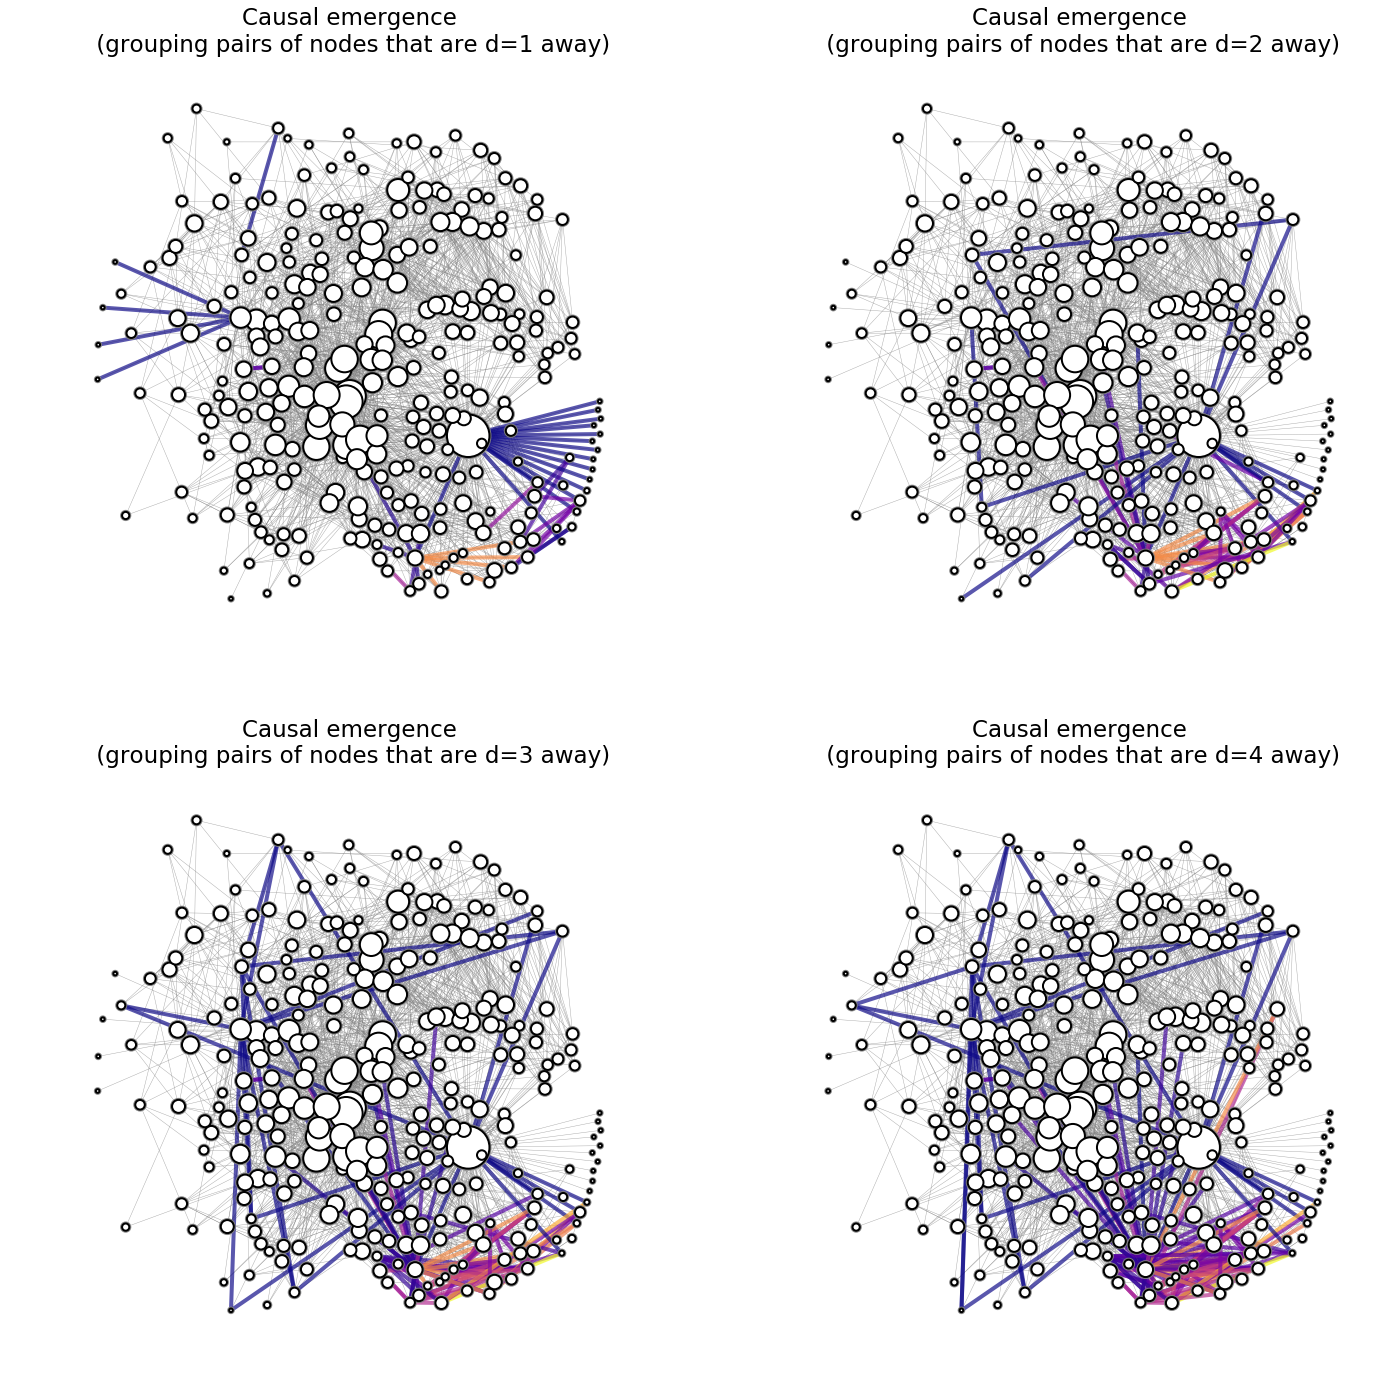

In [31]:
G = nx.to_undirected(G)
ns = np.array(list(dict(G.degree()).values()))*13

pos = nx.kamada_kawai_layout(G)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(24,24))

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=4, node_size=ns, 
                       alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",
                       width=0.45, alpha=0.68, ax=ax0)
nx.draw_networkx_edges(G, pos, edgelist=edges1.keys(), edge_color=ec1, 
                       width=4.0, alpha=0.68, ax=ax0)
ax0.axis('off')
title0 = "Causal emergence\n (grouping pairs of nodes that are d=1 away)"
ax0.set_title(title0, size=23)

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=4, node_size=ns, 
                       alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey", 
                       width=0.45, alpha=0.68, ax=ax1)
nx.draw_networkx_edges(G, pos, edgelist=edges2.keys(), edge_color=ec2, 
                       width=4.0, alpha=0.68, ax=ax1)
ax1.axis('off')
title1 = "Causal emergence\n (grouping pairs of nodes that are d=2 away)"
ax1.set_title(title1, size=23)

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=4, node_size=ns, 
                       alpha=0.95, ax=ax2).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax2).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey", 
                       width=0.45, alpha=0.68, ax=ax2)
nx.draw_networkx_edges(G, pos, edgelist=edges3.keys(), edge_color=ec3, 
                       width=4.0, alpha=0.68, ax=ax2)
ax2.axis('off')
title2 = "Causal emergence\n (grouping pairs of nodes that are d=3 away)"
ax2.set_title(title2, size=23)

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=4, node_size=ns, 
                       alpha=0.95, ax=ax3).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax3).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey", 
                       width=0.45, alpha=0.68, ax=ax3)
nx.draw_networkx_edges(G, pos, edgelist=edges4.keys(), edge_color=ec4, 
                       width=4.0, alpha=0.68, ax=ax3)
ax3.axis('off')
title3 = "Causal emergence\n (grouping pairs of nodes that are d=4 away)"
ax3.set_title(title3, size=23)

# plt.savefig("figs/CausalEmergence_cElegans_nodePairings.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_cElegans_nodePairings.pdf", dpi=425, bbox_inches='tight')
# plt.show()

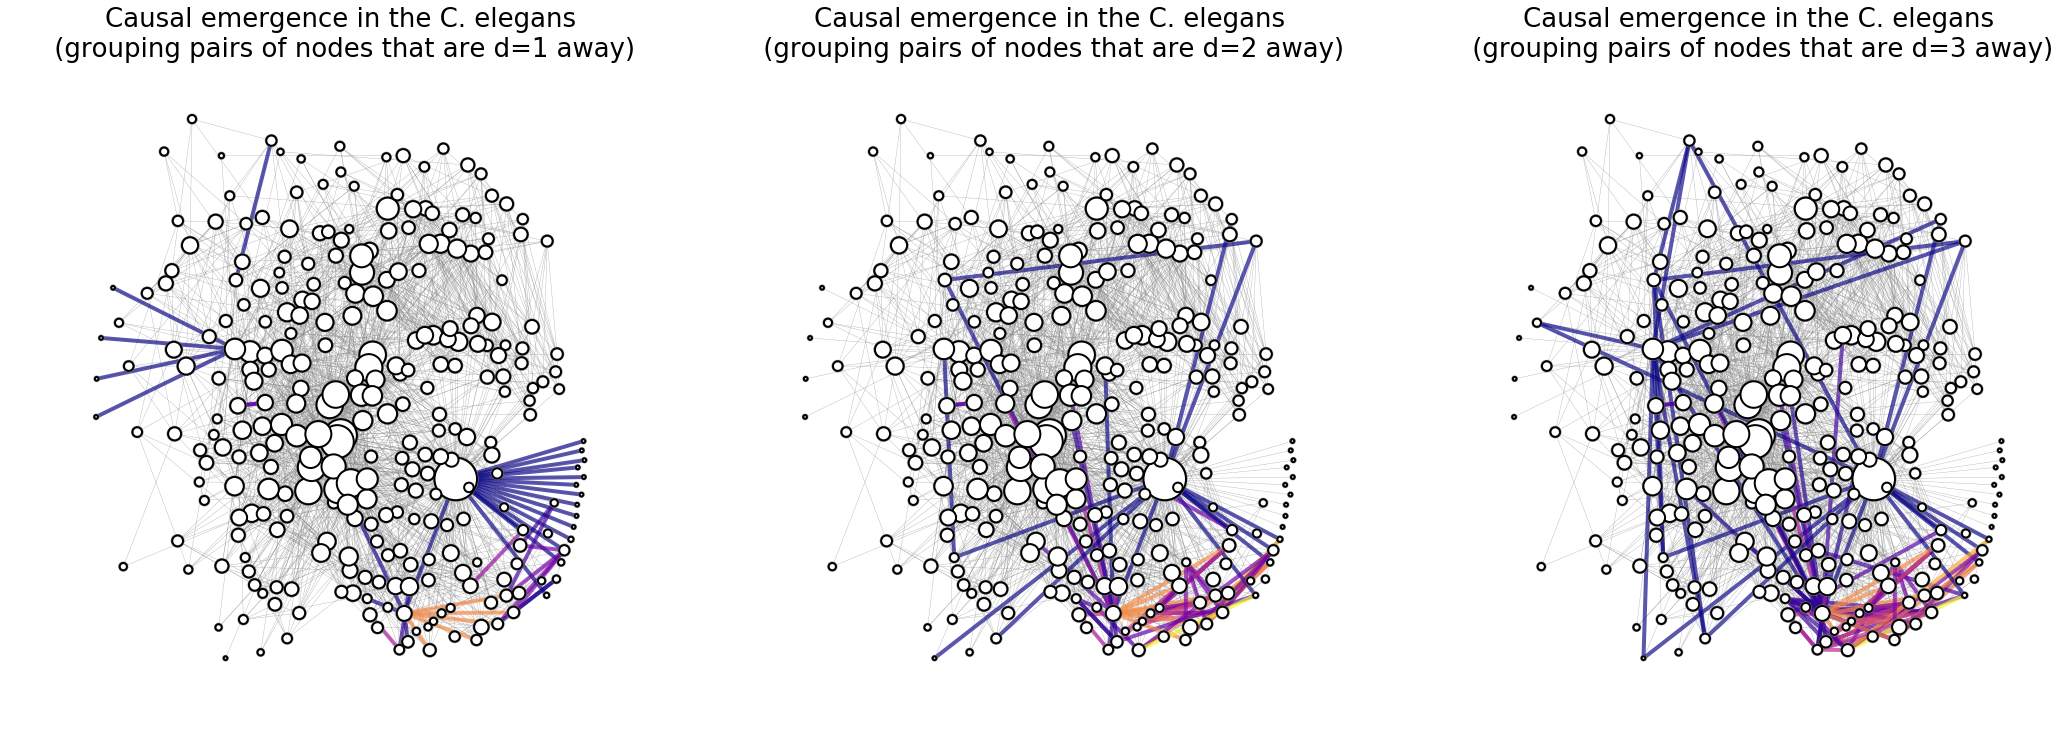

In [12]:
G = nx.to_undirected(G)
ns = np.array(list(dict(G.degree()).values()))*13

pos = nx.kamada_kawai_layout(G)
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(36,12))
# fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(48,12))

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=3, node_size=ns, 
                       alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax0).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey",
                       width=0.35, alpha=0.68, ax=ax0)
nx.draw_networkx_edges(G, pos, edgelist=edges1.keys(), edge_color=ec1, 
                       width=4.0, alpha=0.68, ax=ax0)
ax0.axis('off')
title0 = "Causal emergence in the C. elegans\n (grouping pairs of nodes that are d=1 away)"
ax0.set_title(title0, size=26)

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=3, node_size=ns, 
                       alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax1).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey", 
                       width=0.35, alpha=0.68, ax=ax1)
nx.draw_networkx_edges(G, pos, edgelist=edges2.keys(), edge_color=ec2, 
                       width=4.0, alpha=0.68, ax=ax1)
ax1.axis('off')
title1 = "Causal emergence in the C. elegans\n (grouping pairs of nodes that are d=2 away)"
ax1.set_title(title1, size=26)

nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=3, node_size=ns, 
                       alpha=0.95, ax=ax2).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, node_color='white', 
                       linewidths=2, node_size=ns, 
                       ax=ax2).set_edgecolor('k')
nx.draw_networkx_edges(G, pos, edge_color="grey", 
                       width=0.35, alpha=0.68, ax=ax2)
nx.draw_networkx_edges(G, pos, edgelist=edges3.keys(), edge_color=ec3, 
                       width=4.0, alpha=0.68, ax=ax2)
ax2.axis('off')
title2 = "Causal emergence in the C. elegans\n (grouping pairs of nodes that are d=3 away)"
ax2.set_title(title2, size=26)

# nx.draw_networkx_nodes(G, pos, node_color='white', 
#                        linewidths=3, node_size=ns, 
#                        alpha=0.95, ax=ax3).set_edgecolor('grey')
# nx.draw_networkx_nodes(G, pos, node_color='white', 
#                        linewidths=2, node_size=ns, 
#                        ax=ax3).set_edgecolor('k')
# nx.draw_networkx_edges(G, pos, edge_color="grey", 
#                        width=0.25, alpha=0.68, ax=ax3)
# nx.draw_networkx_edges(G, pos, edgelist=edges4.keys(), edge_color=ec4, 
#                        width=4.0, alpha=0.68, ax=ax3)
# ax3.axis('off')
# title3 = "Causal emergence\n (grouping pairs of nodes that are d=4 away)"
# ax3.set_title(title3, size=23)

# plt.savefig("figs/CausalEmergence_cElegans_nodePairings.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/CausalEmergence_cElegans_nodePairings.pdf", dpi=425, bbox_inches='tight')
# plt.show()

## 5.2.0 Bipartite Structure

In [6]:
def make_bipartite(N_left_side, N_right_side, N_lattice=2, conn="across"):

    left_side = range(N_left_side)
    right_side = range(N_left_side, (N_left_side+N_right_side))
    G = nx.Graph()
    G.add_nodes_from(left_side)
    G.add_nodes_from(right_side)
    attrs = {}
    color = {}
    for i in left_side:
        attrs[i] = 'left'
        color[i] = 'red'
    for i in right_side:
        attrs[i] = 'right'
        color[i] = 'blue'
    nx.set_node_attributes(G, attrs, 'side')
    nx.set_node_attributes(G, color, 'color')
    
    if conn=='across' or conn=='both':
        for i in range(len(left_side)):
            G.add_edge(left_side[i], right_side[i])
    
    if conn=='degen':
        for i in range(len(left_side)):
            G.add_edge(left_side[i], right_side[0])

    if N_lattice==0:
        return G
    
    lattice_nodes = list(range(N_lattice))
    backwards = len(lattice_nodes)
    for i in lattice_nodes:
        for j in lattice_nodes:
            if i!=j:
                G.add_edge(left_side[i], right_side[j])
    
    labels = dict(zip(list(G.nodes()), list(np.array(G.nodes(), dtype=str))))
    nx.set_node_attributes(G, labels, 'label')
    
    return G

In [7]:
def get_pos(G, N_left_side=3, N_right_side=3):
    
    left_side = range(N_left_side)
    right_side = range(N_left_side, (N_left_side+N_right_side))

    pos = {}
    y_range = [0, max([N_left_side, N_right_side])]
    x_range = [-0.5, 0.5]
    left_x  = np.linspace(x_range[0], x_range[0], num=N_left_side)
    right_x = np.linspace(x_range[1], x_range[1], num=N_right_side)
    left_y  = np.linspace(y_range[0], y_range[1], num=N_left_side)
    right_y = np.linspace(y_range[0], y_range[1], num=N_right_side)
    
    for i in left_side:
        pos[i] = np.array([left_x[i], left_y[i]])
        
    for i, r in enumerate(right_side):
        pos[r] = np.array([right_x[i], right_y[i]])
    
    return pos

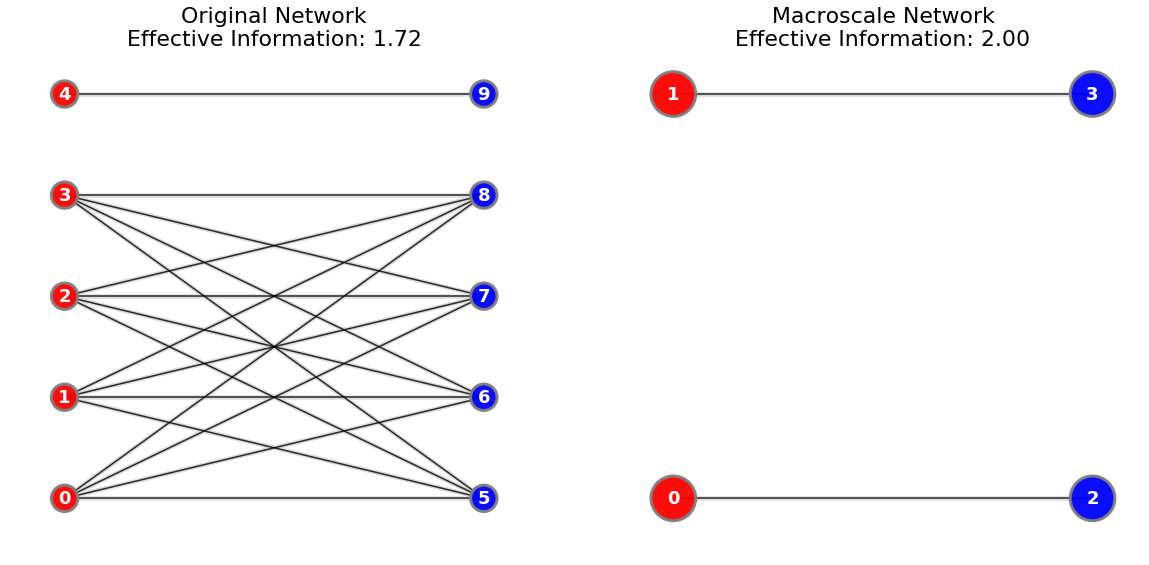

In [97]:
N_left_side  = 5
N_right_side = 5
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_lattice = 4
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns  = 700

########################################
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=22)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

########################################
########################################

left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 2
N_right_side = 2
N_lattice = 0
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

########################################
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Macroscale Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=22)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite0.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite0.pdf", dpi=425, bbox_inches='tight')
plt.show()

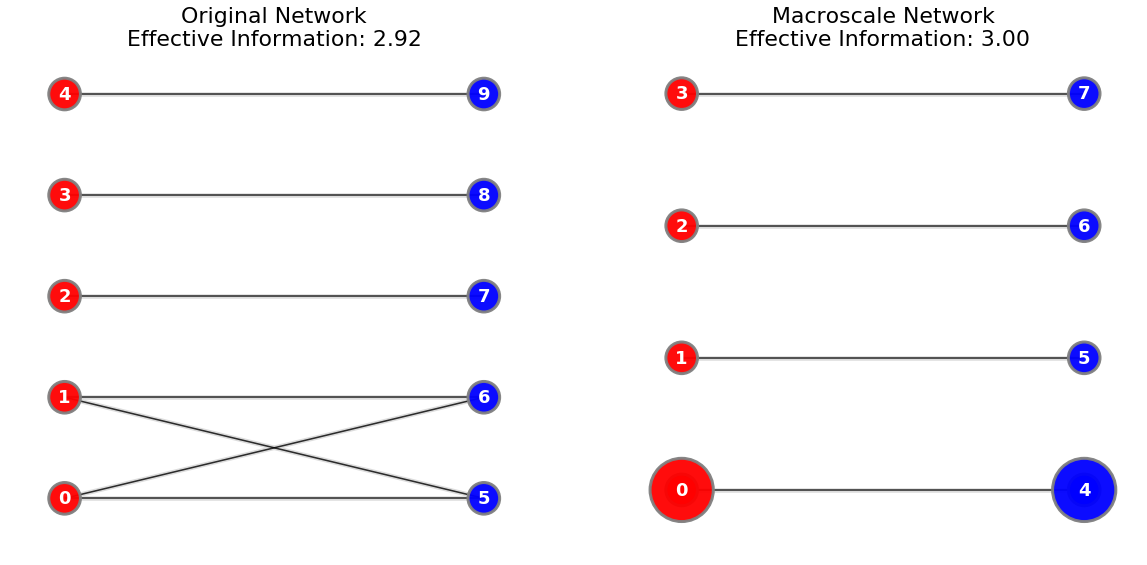

In [96]:
N_left_side  = 5
N_right_side = 5
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_lattice = 2
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns = 1000

########################################
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=22)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

########################################
########################################

left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 4
N_right_side = 4
N_lattice = 0
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

########################################
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=[0,4], node_color=['red','blue'], node_size=ns*4, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Macroscale Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=22)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite1.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite1.pdf", dpi=425, bbox_inches='tight')
plt.show()

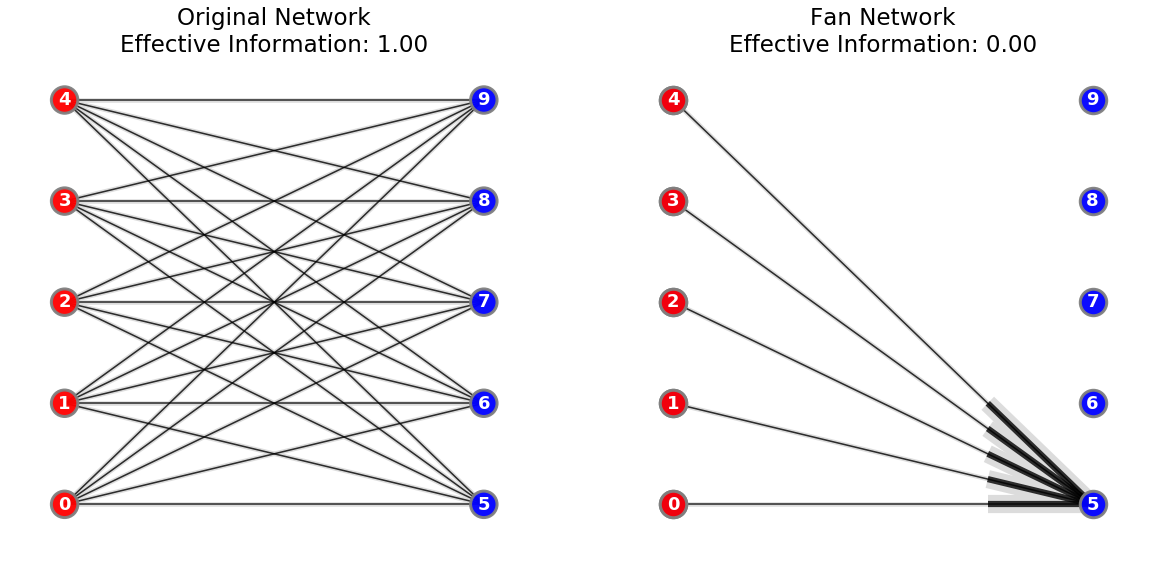

In [98]:
left_side = list(range(N_left_side))
right_side = list(range(N_left_side, (N_left_side+N_right_side)))
N_left_side  = 5
N_right_side = 5
N_lattice = 5
G = make_bipartite(N_left_side, N_right_side, N_lattice, conn="across")
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns  = 700

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=23)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

######################

G = nx.DiGraph()
G.add_edge(0, 5)
G.add_edge(1, 5)
G.add_edge(2, 5)
G.add_edge(3, 5)
G.add_edge(4, 5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)
N_left_side  = 5
N_right_side = 5
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')

nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Fan Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=23)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite2.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite2.pdf", dpi=425, bbox_inches='tight')
plt.show()

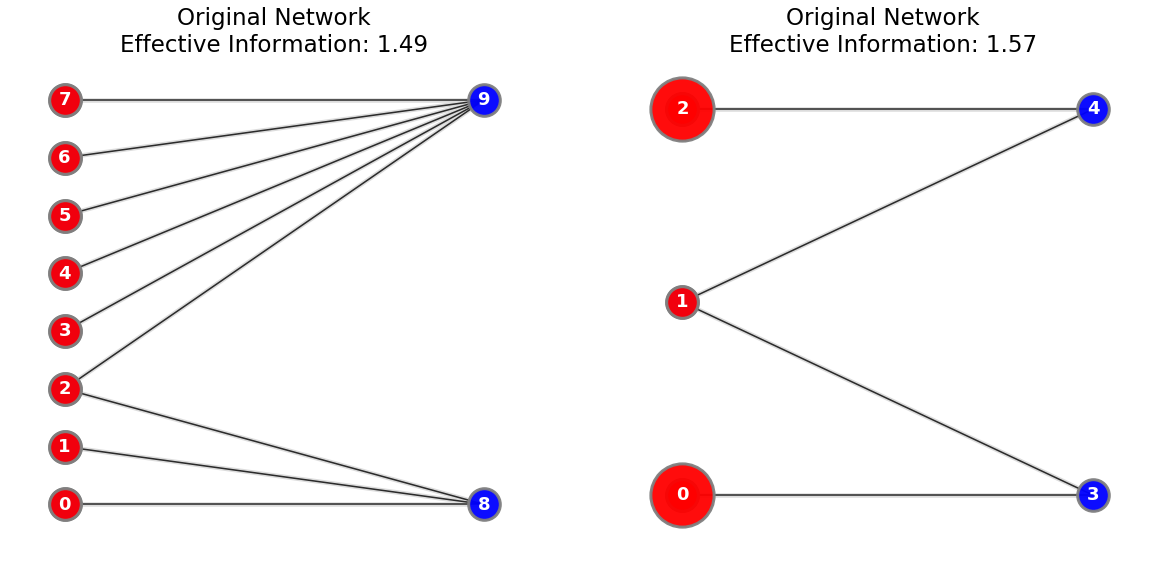

In [94]:
G = nx.Graph()
G.add_edge(0, 8)
G.add_edge(1, 8)
G.add_edge(2, 8)
G.add_edge(2, 9)
G.add_edge(3, 9)
G.add_edge(4, 9)
G.add_edge(5, 9)
G.add_edge(6, 9)
G.add_edge(7, 9)
N_left_side  = 8
N_right_side = 2
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())
ns = 1000

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax0).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax0)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax0)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax0.set_title(title, size=23)
ax0.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax0)

G = nx.Graph()
G.add_edge(2, 4)
G.add_edge(1, 4)
G.add_edge(1, 3)
G.add_edge(0, 3)
N_left_side  = 3
N_right_side = 2
left_nodes = list(range(N_left_side))
pos = get_pos(G, N_left_side, N_right_side)
node_colors = list(nx.get_node_attributes(G, 'color').values())

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='red', node_size=ns, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_nodes(G, pos, nodelist=[0,2], node_color='red', node_size=ns*4, 
                       linewidths=3, alpha=0.95, ax=ax1).set_edgecolor('grey')
nx.draw_networkx_edges(G, pos, edge_color="gainsboro",width=4.55, alpha=0.98, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.55, alpha=0.8, ax=ax1)
title = "Original Network\nEffective Information: %.2f"%(np.round(get_ei(G),5))
ax1.set_title(title, size=23)
ax1.axis('off')
nx.draw_networkx_labels(G, pos, font_size=18, font_color='w', font_weight='bold', ax=ax1)

# plt.savefig("figs/Macronode_Bipartite3.png", dpi=425, bbox_inches='tight')
# plt.savefig("figs/Macronode_Bipartite3.pdf", dpi=425, bbox_inches='tight')
plt.show()